# Diversity in Top Grossing Films


## Introduction 

This notebook provides the research on last decade's top grossing actors and actresses world-wide. For each actor, I looked into their <b>ethnicity</b>, <b>star score</b>, and <b>average billing</b>. The definitions for star score and average billing can be found below. 

<b>Star Score</b> is given to actors based on the number of top-grossing films they are featured in. If a film has the highest rank in the box office, that actor gets a star score of 100. If the film is Number 2, the actor gets 99 and so on. The score includes films in current year and the two previous. 
<br><b>Average Billing</b> showcases where the actor lands on the billing of a film. If the actor has the lead role, the billing would be 1. If the role is a minor role, that number would be lower. 

Quickly glancing at 2010's data vs 2020's data, I noticed a stark difference with the year's Top 3 grossing actors. I was curious if movements like #OscarsSoWhite and #BLM have changed the film industry. Tasked with the opportunity to guide Microsoft when entering the film industry in 2020, I used the following questions as a guide for my analysis. 
1. Do films do better in the box office if it features people of color?
2. Are there more people of color in top-grossing films now than before?
3. Are people of color casted for lead roles or do they play supporting characters?
    
Focusing on Diversity and Inclusion when first entering the film industry can build Microsoft's reputation as a company that lives up to its values. Microsoft has the power to lead the way, and give voices to oppressed populations. With that focus, they can grow and maintain their audience numbers.

## Scraping the Data

For my research, I scraped star score data and average billing data for top-grossing actors from 2010 to 2020 from the-numbers.com. Then after, I scraped data from ethnicelebs.com to find each celebrity's ethnicity. For the sake of the project, I categorized ethnicities into 5 racial categories defined by census.org- White, Black, Asian, Native American/ Alaskan Native, Hawaiian Native/ Pacific Islander. The Census Bureau classifies Hispanic or Latino as an ethnicity, not as a race, which compromises a significant minority group in the U.S. In this project, Mexicans, Central and South Americans were classified as American Native. 

### 2010 Data

In [1]:
#Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

<b>Data for Top Grossing Actors - Star Score & Average Billing</b>
<br>The code below gets the star score and average billing data for 2010 top-grossing actors. It creates a list of the actors' names, star scores, and average billings. These lists will be used later on to create a dataframe with the necessary information

In [2]:
#Extract data from the-numbers.com to get highest-grossing stars for 2010 
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2010-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Create list with actor's names for top-grossing stars
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2010 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2010 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2010.append(score)
    
#Creates list with actor's billing average 
avg_billing_2010 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2010.append(billing)

#Preview lists
print(actors_names_2010[:5])
print(star_score_2010[:5])
print(avg_billing_2010[:5])

['Robert Downey, Jr.', 'Taylor Lautner', 'Shia LaBeouf', 'Christian Bale', 'Robert Pattinson']
[410, 343, 309, 303, 281]
[1.4, 6.0, 2.8, 1.5, 1.8]


<b>Ethnicity Data</b>
<br>The code below creates a list of url's from the list of actors' names. The list of url links is meant to provide the webpage where we will scrape the ethnicity data we need for the project. The for loop goes through each webpage, and searches for the ethnicity string. It then adds that string to a list of ethnicities.

In [3]:
#To scrape data from ethnicelebs.com, we need to create a list with the following format
#ethnicelebs.com + /firstName-lastName
#Create a list of urls to by adding celeb name to ethnicelebs.com
url_names_2010 = []
for name in actors_names_2010:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2010.append(ethniceleb_url)

#From ethnicelebs.com, scrape the data for each celebrity's ethnicity.
#Create list of celeb ethnicity, filling 'NA' if page or ethnicity is not found
celeb_ethnicity_2010 = []
for url in url_names_2010:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2010.append(ethnicity)

<b>Racial Category Data</b>
<br>As mentioned earlier, the code below takes the ethnicity string and categorizes each actor into racial categories based on the string. 
Ethnicities in North and South America were classified as American Indian or Alaskan Native. 
Ethnicities in Asia were classified as Asian. 
Ethnicities in Africa were classified as Black. 
Ethnicities in Hawaii or the Pacific Islands were classified as Hawaiian Native/ Pacific Islander. 
I understand this is in no way representative of how the actors identify themselves so there are some inaccuracies to this method. The code goes through the list of ethnicities and categorizes them into the 5 racial categories. The racial category is then added to a list, which then creates another list of booleans that determine if an actor is a person of color or not. Lastly, the code takes all the lists together and creates a dataframe that includes the actors' name, star score, average billing, ethnicity, racial category and POC status. 

In [4]:
#categorize ethnicities into Black, Asian, Native Hawaiian/Pacific Islander, Native American/Alaskan Native, or White  
racial_category_2010 = []
for ethnicity in celeb_ethnicity_2010:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2010.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2010 = []
for rac_cat in racial_category_2010:
    poc_bool = (rac_cat != 'White')
    poc_2010.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2010'] * len(actors_names_2010)

#Create and preview DataFrame
celebdf_2010 = pd.DataFrame({'year':year, 'name': actors_names_2010, 'star_score': star_score_2010, 'avg_billing':avg_billing_2010, 'ethnicity': celeb_ethnicity_2010, 'racial_category': racial_category_2010, 'poc': poc_2010})
celebdf_2010.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2010,"Robert Downey, Jr.",410,1.4,"Ashkenazi Jewish (three eighths), as well as E...",White,False
1,2010,Taylor Lautner,343,6.0,"Swiss-German, German, English, Dutch, Scottish...",White,False
2,2010,Shia LaBeouf,309,2.8,*Cajun/French (father)\n*Ashkenazi Jewish (mot...,White,False
3,2010,Christian Bale,303,1.5,"English, as well as distant Channel Islander [...",White,False
4,2010,Robert Pattinson,281,1.8,English,White,False


<b>Cleaning the Data</b>
<br>Johnny Depp's case does exemplify the flaw in my method of racial categorization. Johnny Depp classified as Black because his ethnicity string contains 'African', though his fraction for African is 3/2048.
Because Johnny Depp has a high star score and there are so few Black actors to begin with, this throws off the star score mean tremendously. For this reason, his racial category and POC status is updated. The same will be the case for Jeremy Renner and Ryan Gosling in later years as well. 

In [5]:
#Update Johnny Depp's racial category and POC status
celebdf_2010.at[9, 'racial_category'] = 'White'
celebdf_2010.at[9, 'poc'] = False

#preview info to make sure it's updated
celebdf_2010.iloc[[9]]

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
9,2010,Johnny Depp,259,2.5,"English, along with small amounts of Irish, Sc...",White,False


<b>Aggregate the Data</b>

In [6]:
#Preview data on 2010's top-grossing actors's star_score and average billing
celebdf_2010.groupby(celebdf_2010['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,173.000000,3.600000,True
Asian,174.000000,1.900000,True
Black,133.800000,1.800000,True
White,172.857143,2.587912,False


In [7]:
#Preview data on the number of actors for each racial category
celebdf_2010.groupby(celebdf_2010['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,2,2,2,2,2,2
Asian,2,2,2,2,2,2
Black,5,5,5,5,5,5
White,91,91,91,91,91,91


<b>Findings</b>
<br>So far in our findings, we see that star scores for Asian, White, and American Indian/ Alaskan Native are relatively close, though there are plenty more White actors than there are of the others. We also see that the star score for Black actors is approximately 40 points lower than their counterparts. 

<b>2011 - 2020</b>
<br>The same code is written to scrape information for 2011-2020. Feel free to scroll down unless you'd like to preview the aggregates for the different years.

### 2011 Data

In [8]:
#Extract data from the-numbers.com to get highest-grossing stars for 2011 
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2011-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2011 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2011 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2011.append(score)
    
#Creates list with actor's billing average 
avg_billing_2011 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2011.append(billing)

#Preview lists
print(actors_names_2011[:5])
print(star_score_2011[:5])
print(avg_billing_2011[:5])

['Bradley Cooper', 'Taylor Lautner', 'Johnny Depp', 'Robert Downey, Jr.', 'Robert Pattinson']
[428, 373, 357, 341, 326]
[2.5, 5.0, 2.2, 1.0, 1.8]


In [9]:
#Create a list of urls by adding celeb name to ethnicelebs.com
url_names_2011 = []
for name in actors_names_2011:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2011.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2011 = []
for url in url_names_2011:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2011.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2011 = []
for ethnicity in celeb_ethnicity_2011:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2011.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2011 = []
for rac_cat in racial_category_2010:
    poc_bool = (rac_cat != 'White')
    poc_2011.append(poc_bool)
    
#Fill in Year 
year = ['2011'] * len(actors_names_2011)

celebdf_2011 = pd.DataFrame({'year': year, 'name': actors_names_2011, 'star_score': star_score_2011, 'avg_billing': avg_billing_2011, 'ethnicity': celeb_ethnicity_2011, 'racial_category': racial_category_2011, 'poc': poc_2011})
celebdf_2011.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2011,Bradley Cooper,428,2.5,*Irish (father)\n*Italian (mother),White,False
1,2011,Taylor Lautner,373,5.0,"Swiss-German, German, English, Dutch, Scottish...",White,False
2,2011,Johnny Depp,357,2.2,"English, along with small amounts of Irish, Sc...",Black,False
3,2011,"Robert Downey, Jr.",341,1.0,"Ashkenazi Jewish (three eighths), as well as E...",White,False
4,2011,Robert Pattinson,326,1.8,English,White,False


In [10]:
#Update Johnny Depp's racial category and poc status
celebdf_2011.at[2, 'racial_category'] = 'White'
celebdf_2011.at[2, 'poc'] = False

In [11]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2011.groupby(celebdf_2011['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,158.000000,17.000000,0.000000
Black,145.833333,3.250000,0.000000
Native Hawaiin or Other Pacific Islander,136.000000,2.000000,0.000000
White,182.688889,3.026667,0.111111


In [12]:
#Preview data on the number of actors for each racial category
celebdf_2011.groupby(celebdf_2011['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,3,3,3,3,3,3
Black,6,6,6,6,6,6
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,90,90,90,90,90,90


### 2012 Data

In [13]:
#Extract data from the-numbers.com to get highest-grossing stars for 2010 
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2012-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2012 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2012 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2012.append(score)
    
#Creates list with actor's billing average 
avg_billing_2012 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2012.append(billing)

#Preview lists
print(actors_names_2012[:5])
print(star_score_2012[:5])
print(avg_billing_2012[:5])

['Taylor Lautner', 'Kristen Stewart', 'Robert Downey, Jr.', 'Liam Neeson', 'Johnny Depp']
[374, 368, 348, 346, 341]
[5.0, 1.0, 1.0, 2.2, 1.0]


In [14]:
#Create a list of urls by adding celeb name to ethnicelebs.com
url_names_2012 = []
for name in actors_names_2012:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2012.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2012 = []
for url in url_names_2012:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2012.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2012 = []
for ethnicity in celeb_ethnicity_2012:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2012.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2012 = []
for rac_cat in racial_category_2012:
    poc_bool = (rac_cat != 'White')
    poc_2012.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2012'] * len(actors_names_2012)

celebdf_2012 = pd.DataFrame({'year': year, 'name': actors_names_2012, 'star_score': star_score_2012, 'avg_billing':avg_billing_2012, 'ethnicity': celeb_ethnicity_2012, 'racial_category': racial_category_2012, 'poc': poc_2012})
celebdf_2012.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2012,Taylor Lautner,374,5.0,"Swiss-German, German, English, Dutch, Scottish...",White,False
1,2012,Kristen Stewart,368,1.0,"possibly Scottish, English",White,False
2,2012,"Robert Downey, Jr.",348,1.0,"Ashkenazi Jewish (three eighths), as well as E...",White,False
3,2012,Liam Neeson,346,2.2,Irish,White,False
4,2012,Johnny Depp,341,1.0,"English, along with small amounts of Irish, Sc...",Black,True


In [15]:
#Update Johnny Depp's racial category and poc status
celebdf_2012.at[4, 'racial_category'] = 'White'
celebdf_2012.at[4, 'poc'] = False

#Update Jeremy Renner's racial category and poc status
celebdf_2012.at[7, 'racial_category'] = 'White'
celebdf_2012.at[7, 'poc'] = False

In [16]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2012.groupby(celebdf_2012['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,137.500000,23.850000,True
Asian,153.250000,2.200000,True
Black,157.250000,4.000000,True
Native Hawaiin or Other Pacific Islander,214.000000,1.700000,True
White,187.359551,3.057303,False


In [17]:
#Preview data on the number of actors for each racial category
celebdf_2012.groupby(celebdf_2012['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,2,2,2,2,2,2
Asian,4,4,4,4,4,4
Black,4,4,4,4,4,4
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,89,89,89,89,89,89


### 2013 Data

In [18]:
#Extract data from the-numbers.com to get highest-grossing stars for 2013
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2013-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2013 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2013 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2013.append(score)
    
#Creates list with actor's billing average 
avg_billing_2013 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2013.append(billing)

#Preview lists
print(actors_names_2013[:5])
print(star_score_2013[:5])
print(avg_billing_2013[:5])

['Jennifer Lawrence', 'Jeremy Renner', 'Chris Hemsworth', 'Bradley Cooper', 'Dwayne Johnson']
[407, 401, 394, 365, 365]
[2.4, 3.2, 2.0, 1.4, 2.4]


In [19]:
#Create a list of urls by adding celeb name to ethnicelebs.com
url_names_2013 = []
for name in actors_names_2013:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2013.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2013 = []
for url in url_names_2013:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2013.append(ethnicity)
    
#categorize ethnicities into Black, Asian, Native Hawaiian/Pacific Islander, American Indian/Alaskan Native
racial_category_2013 = []
for ethnicity in celeb_ethnicity_2013:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2013.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2013 = []
for rac_cat in racial_category_2013:
    poc_bool = (rac_cat != 'White')
    poc_2013.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2013'] * len(actors_names_2013)
    
#Create DataFrame with 2013 information
celebdf_2013 = pd.DataFrame({'year': year, 'name': actors_names_2013, 'star_score': star_score_2013, 'avg_billing': avg_billing_2013, 'ethnicity': celeb_ethnicity_2013, 'racial_category': racial_category_2013, 'poc': poc_2013})
celebdf_2013.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2013,Jennifer Lawrence,407,2.4,"English, German, Irish, Scottish, Scots-Irish/...",White,False
1,2013,Jeremy Renner,401,3.2,"Panamanian/Jamaican/African-Caribbean, German,...",Black,True
2,2013,Chris Hemsworth,394,2.0,"Dutch (maternal grandfather), Irish, English, ...",White,False
3,2013,Bradley Cooper,365,1.4,*Irish (father)\n*Italian (mother),White,False
4,2013,Dwayne Johnson,365,2.4,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True


In [20]:
#Update Jeremy Renner's racial category and poc status
celebdf_2013.at[1, 'racial_category'] = 'White'
celebdf_2013.at[1, 'poc'] = False

#Update Johnny Depp's racial category and poc status
celebdf_2013.at[18, 'racial_category'] = 'White'
celebdf_2013.at[18, 'poc'] = False

In [21]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2013.groupby(celebdf_2013['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,167.000000,2.00,True
Asian,164.666667,4.50,True
Black,174.800000,2.79,True
Native Hawaiin or Other Pacific Islander,365.000000,2.40,True
White,187.552941,2.58,False


In [22]:
#Preview data on the number of actors for each racial category
celebdf_2013.groupby(celebdf_2013['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,3,3,3,3,3,3
Black,10,10,10,10,10,10
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,85,85,85,85,85,85


### 2014 Data

In [23]:
#Extract data from the-numbers.com to get highest-grossing stars for 2013
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2014-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2014 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2014 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2014.append(score)
    
#Creates list with actor's billing average 
avg_billing_2014 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2014.append(billing)

#Preview lists
print(actors_names_2014[:5])
print(star_score_2014[:5])
print(avg_billing_2014[:5])

['Jennifer Lawrence', 'Channing Tatum', 'Dwayne Johnson', 'Liam Neeson', 'Chris Hemsworth']
[516, 398, 337, 323, 308]
[2.5, 1.8, 2.0, 3.2, 2.2]


In [24]:
url_names_2014 = []
for name in actors_names_2014:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2014.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2014 = []
for url in url_names_2014:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2014.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2014 = []
for ethnicity in celeb_ethnicity_2014:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2014.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2014 = []
for rac_cat in racial_category_2014:
    poc_bool = (rac_cat != 'White')
    poc_2014.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2014'] * len(actors_names_2014)
    
#Create DataFrame with 2013 information
celebdf_2014 = pd.DataFrame({'year': year, 'name': actors_names_2014, 'star_score': star_score_2014, 'avg_billing': avg_billing_2014, 'ethnicity': celeb_ethnicity_2014, 'racial_category': racial_category_2014, 'poc': poc_2014})
celebdf_2014.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2014,Jennifer Lawrence,516,2.5,"English, German, Irish, Scottish, Scots-Irish/...",White,False
1,2014,Channing Tatum,398,1.8,"English, some Scots-Irish/Northern Irish and I...",White,False
2,2014,Dwayne Johnson,337,2.0,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
3,2014,Liam Neeson,323,3.2,Irish,White,False
4,2014,Chris Hemsworth,308,2.2,"Dutch (maternal grandfather), Irish, English, ...",White,False


In [25]:
#Update Jeremy Renner's racial category and poc status
celebdf_2014.at[6, 'racial_category'] = 'White'
celebdf_2014.at[6, 'poc'] = False

#Update Johnny Depp's racial category and poc status
celebdf_2014.at[34, 'racial_category'] = 'White'
celebdf_2014.at[34, 'poc'] = False

In [26]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2014.groupby(celebdf_2014['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,185.000000,4.500000,True
Asian,151.000000,4.375000,True
Black,179.700000,3.140000,True
Native Hawaiin or Other Pacific Islander,337.000000,2.000000,True
White,163.988095,2.540476,False


In [27]:
#Preview data on the number of actors for each racial category
celebdf_2014.groupby(celebdf_2014['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,4,4,4,4,4,4
Black,10,10,10,10,10,10
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,84,84,84,84,84,84


### 2015 Data

In [28]:
#Extract data from the-numbers.com to get highest-grossing stars for 2015
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2015-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2015 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2015 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2015.append(score)
    
#Creates list with actor's billing average 
avg_billing_2015 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2015.append(billing)

#Preview lists
print(actors_names_2015[:5])
print(star_score_2015[:5])
print(avg_billing_2015[:5])

['Jennifer Lawrence', 'Dwayne Johnson', 'Samuel L. Jackson', 'Channing Tatum', 'Hugh Jackman']
[475, 344, 324, 321, 301]
[2.3, 2.0, 5.3, 1.6, 1.4]


In [29]:
#Create list of urls for each celebrity 
url_names_2015 = []
for name in actors_names_2015:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2015.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2015 = []
for url in url_names_2015:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2015.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2015 = []
for ethnicity in celeb_ethnicity_2015:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2015.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2015 = []
for rac_cat in racial_category_2015:
    poc_bool = (rac_cat != 'White')
    poc_2015.append(poc_bool)

#Fill in Year for later concatenation
year = ['2015'] * len(actors_names_2015)
    
#Create DataFrame with 2015 information
celebdf_2015 = pd.DataFrame({'year': year, 'name': actors_names_2015, 'star_score': star_score_2015, 'avg_billing': avg_billing_2015, 'ethnicity': celeb_ethnicity_2015, 'racial_category': racial_category_2015, 'poc': poc_2015})
celebdf_2015.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2015,Jennifer Lawrence,475,2.3,"English, German, Irish, Scottish, Scots-Irish/...",White,False
1,2015,Dwayne Johnson,344,2.0,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
2,2015,Samuel L. Jackson,324,5.3,"African-American, likely some English",Black,True
3,2015,Channing Tatum,321,1.6,"English, some Scots-Irish/Northern Irish and I...",White,False
4,2015,Hugh Jackman,301,1.4,*62.5% English\n*25% Scottish\n*12.5% Greek,White,False


In [30]:
#Update Jeremy Renner's racial category and poc status
celebdf_2015.at[13, 'racial_category'] = 'White'
celebdf_2015.at[13, 'poc'] = False

#Update Johnny Depp's racial category and poc status
celebdf_2015.at[75, 'racial_category'] = 'White'
celebdf_2015.at[75, 'poc'] = False

In [31]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2015.groupby(celebdf_2015['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,185.000000,4.500000,True
Asian,176.500000,5.900000,True
Black,173.363636,2.890909,True
Native Hawaiin or Other Pacific Islander,344.000000,2.000000,True
White,162.823529,2.508235,False


In [32]:
#Preview data on the number of actors for each racial category
celebdf_2015.groupby(celebdf_2015['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,2,2,2,2,2,2
Black,11,11,11,11,11,11
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,85,85,85,85,85,85


### 2016 Data

In [33]:
#Extract data from the-numbers.com to get highest-grossing stars for 2016
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2016-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2016 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2016 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2016.append(score)
    
#Creates list with actor's billing average 
avg_billing_2016 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2016.append(billing)

#Preview lists
print(actors_names_2016[:5])
print(star_score_2016[:5])
print(avg_billing_2016[:5])

['Jennifer Lawrence', 'Samuel L. Jackson', 'Scarlett Johansson', 'Chris Pratt', 'Matt Damon']
[466, 392, 374, 311, 299]
[2.0, 6.0, 2.8, 1.5, 1.3]


In [34]:
url_names_2016 = []
for name in actors_names_2016:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2016.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2016 = []
for url in url_names_2016:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2016.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2016 = []
for ethnicity in celeb_ethnicity_2016:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2016.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2016 = []
for rac_cat in racial_category_2016:
    poc_bool = (rac_cat != 'White')
    poc_2016.append(poc_bool)

#Fill in Year for later concatenation
year = ['2016'] * len(actors_names_2016)
    
#Create DataFrame with 2016 information
celebdf_2016 = pd.DataFrame({'year': year, 'name': actors_names_2016, 'star_score': star_score_2016, 'avg_billing': avg_billing_2016, 'ethnicity': celeb_ethnicity_2016, 'racial_category': racial_category_2016, 'poc': poc_2016})
celebdf_2016.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2016,Jennifer Lawrence,466,2.0,"English, German, Irish, Scottish, Scots-Irish/...",White,False
1,2016,Samuel L. Jackson,392,6.0,"African-American, likely some English",Black,True
2,2016,Scarlett Johansson,374,2.8,"*Danish, some Swedish (father)\n*Ashkenazi Jew...",White,False
3,2016,Chris Pratt,311,1.5,"*father – English, German, Swiss-German, Frenc...",White,False
4,2016,Matt Damon,299,1.3,"*English, Scottish, distant Welsh (father)\n*F...",White,False


In [35]:
#Update Jeremy Renner's racial category and poc status
celebdf_2016.at[7, 'racial_category'] = 'White'
celebdf_2016.at[7, 'poc'] = False

#Update Johnny Depp's racial category and poc status
celebdf_2016.at[72, 'racial_category'] = 'White'
celebdf_2016.at[72, 'poc'] = False

In [36]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2016.groupby(celebdf_2016['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,173.000000,3.500000,True
Asian,135.000000,3.100000,True
Black,158.692308,3.638462,True
Native Hawaiin or Other Pacific Islander,211.000000,1.000000,True
White,161.975610,2.741463,False


In [37]:
#Preview data on the number of actors for each racial category
celebdf_2016.groupby(celebdf_2016['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,3,3,3,3,3,3
Black,13,13,13,13,13,13
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,82,82,82,82,82,82


### 2017 Data

In [38]:
#Extract data from the-numbers.com to get highest-grossing stars for 2017
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2017-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2017 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2017 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2017.append(score)
    
#Creates list with actor's billing average 
avg_billing_2017 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2017.append(billing)

#Preview lists
print(actors_names_2017[:5])
print(star_score_2017[:5])
print(avg_billing_2017[:5])

['Samuel L. Jackson', 'Dwayne Johnson', 'Vin Diesel', 'Chris Hemsworth', 'Chris Pratt']
[429, 388, 314, 313, 307]
[4.0, 1.2, 1.0, 2.4, 1.5]


In [39]:
#extract data from ethnicelebs.com
url_names_2017 = []
for name in actors_names_2017:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2017.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2017 = []
for url in url_names_2017:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2017.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2017 = []
for ethnicity in celeb_ethnicity_2017:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity or 'Algerian' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2017.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2017 = []
for rac_cat in racial_category_2017:
    poc_bool = (rac_cat != 'White')
    poc_2017.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2017'] * len(actors_names_2017)
    
#Create DataFrame with 2016 information
celebdf_2017 = pd.DataFrame({'year':year, 'name': actors_names_2017, 'star_score': star_score_2017, 'avg_billing': avg_billing_2017, 'ethnicity': celeb_ethnicity_2017, 'racial_category': racial_category_2017, 'poc': poc_2017})
celebdf_2017.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2017,Samuel L. Jackson,429,4.0,"African-American, likely some English",Black,True
1,2017,Dwayne Johnson,388,1.2,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
2,2017,Vin Diesel,314,1.0,"*mother – Scottish, English, German, Irish, Au...",Black,True
3,2017,Chris Hemsworth,313,2.4,"Dutch (maternal grandfather), Irish, English, ...",White,False
4,2017,Chris Pratt,307,1.5,"*father – English, German, Swiss-German, Frenc...",White,False


In [40]:
#Update Johnny Depp's racial category and poc status
celebdf_2017.at[11, 'racial_category'] = 'White'
celebdf_2017.at[11, 'poc'] = False

#Update Jeremy Renner's racial category and poc status
celebdf_2017.at[12, 'racial_category'] = 'White'
celebdf_2017.at[12, 'poc'] = False

#Update Ryan Gosling's racial category and poc status
celebdf_2017.at[36, 'racial_category'] = 'White'
celebdf_2017.at[36, 'poc'] = False

In [41]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2017.groupby(celebdf_2017['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,141.000000,5.750000,True
Asian,164.750000,2.575000,True
Black,206.500000,3.441667,True
Native Hawaiin or Other Pacific Islander,388.000000,1.200000,True
White,182.037037,3.133333,False


In [42]:
#Preview data on the number of actors for each racial category
celebdf_2017.groupby(celebdf_2017['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,2,2,2,2,2,2
Asian,4,4,4,4,4,4
Black,12,12,12,12,12,12
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,81,81,81,81,81,81


### 2018 Data

In [43]:
#Extract data from the-numbers.com to get highest-grossing stars for 2018
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2018-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2018 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2018 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2018.append(score)
    
#Creates list with actor's billing average 
avg_billing_2018 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2018.append(billing)

#Preview lists
print(actors_names_2018[:5])
print(star_score_2018[:5])
print(avg_billing_2018[:5])

['Dwayne Johnson', 'Chris Pratt', 'Chadwick Boseman', 'Johnny Depp', 'Chris Hemsworth']
[449, 406, 336, 322, 301]
[1.2, 5.0, 6.0, 2.0, 2.8]


In [44]:
#Extract data from ethnicelebs.com
url_names_2018 = []
for name in actors_names_2018:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2018.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2018 = []
for url in url_names_2018:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2018.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2018 = []
for ethnicity in celeb_ethnicity_2018:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity or 'Algerian' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2018.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2018 = []
for rac_cat in racial_category_2018:
    poc_bool = (rac_cat != 'White')
    poc_2018.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2018'] * len(actors_names_2018)
    
#Create DataFrame with 2016 information
celebdf_2018 = pd.DataFrame({'year': year, 'name': actors_names_2018, 'star_score': star_score_2018, 'avg_billing': avg_billing_2018, 'ethnicity': celeb_ethnicity_2018, 'racial_category': racial_category_2018, 'poc': poc_2018})
celebdf_2018.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2018,Dwayne Johnson,449,1.2,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
1,2018,Chris Pratt,406,5.0,"*father – English, German, Swiss-German, Frenc...",White,False
2,2018,Chadwick Boseman,336,6.0,African-American,Black,True
3,2018,Johnny Depp,322,2.0,"English, along with small amounts of Irish, Sc...",Black,True
4,2018,Chris Hemsworth,301,2.8,"Dutch (maternal grandfather), Irish, English, ...",White,False


In [45]:
#Update Johnny Depp's racial category and poc status
celebdf_2018.at[3, 'racial_category'] = 'White'
celebdf_2018.at[3, 'poc'] = False

#Update Jeremy Renner's racial category and poc status
celebdf_2018.at[78, 'racial_category'] = 'White'
celebdf_2018.at[78, 'poc'] = False

In [46]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2018.groupby(celebdf_2018['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,269.000000,8.000000,True
Asian,191.000000,8.216667,True
Black,196.842105,5.273684,True
Native Hawaiin or Other Pacific Islander,316.000000,1.850000,True
White,202.263889,3.775000,False


In [47]:
#Preview data on the number of actors for each racial category
celebdf_2018.groupby(celebdf_2018['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,6,6,6,6,6,6
Black,19,19,19,19,19,19
Native Hawaiin or Other Pacific Islander,2,2,2,2,2,2
White,72,72,72,72,72,72


### 2019 Data

In [48]:
#Extract data from the-numbers.com to get highest-grossing stars for 2019
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2019-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2019 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2019 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2019.append(score)
    
#Creates list with actor's billing average 
avg_billing_2019 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2019.append(billing)

#Preview lists
print(actors_names_2019[:5])
print(star_score_2019[:5])
print(avg_billing_2019[:5])

['Dwayne Johnson', 'Samuel L. Jackson', 'Karen Gillan', 'Tom Holland', 'Chris Pratt']
[572, 491, 482, 392, 392]
[1.1, 6.3, 9.8, 7.3, 10.3]


In [49]:
#Extract data from ethnicelebs.com
url_names_2019 = []
for name in actors_names_2019:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names_2019.append(ethniceleb_url)

#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2019 = []
for url in url_names_2019:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        if parent.find('strong') != None:
            ethnicity = parent.find('strong').text
            ethnicity = ethnicity[11:]
        else: 
            ethnicity = 'NA'
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2019.append(ethnicity)
    
#categorize ethnicities into Black or African American, White, Asian     
racial_category_2019 = []
for ethnicity in celeb_ethnicity_2019:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity or 'Algerian' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity or 'Indian' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2019.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2019 = []
for rac_cat in racial_category_2019:
    poc_bool = (rac_cat != 'White')
    poc_2019.append(poc_bool)
    
#Fill in Year for later concatenation
year = ['2019'] * len(actors_names_2019)
    
#Create DataFrame with 2016 information
celebdf_2019 = pd.DataFrame({'year': year, 'name': actors_names_2019, 'star_score': star_score_2019, 'avg_billing': avg_billing_2019, 'ethnicity': celeb_ethnicity_2019, 'racial_category': racial_category_2019, 'poc': poc_2019})
celebdf_2019.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2019,Dwayne Johnson,572,1.1,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
1,2019,Samuel L. Jackson,491,6.3,"African-American, likely some English",Black,True
2,2019,Karen Gillan,482,9.8,Scottish,White,False
3,2019,Tom Holland,392,7.3,"English, Irish",White,False
4,2019,Chris Pratt,392,10.3,"*father – English, German, Swiss-German, Frenc...",White,False


In [50]:
#Update Johnny Depp's racial category and poc status
celebdf_2019.at[28, 'racial_category'] = 'White'
celebdf_2019.at[28, 'poc'] = False

In [51]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2019.groupby(celebdf_2019['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,236.500000,11.350000,True
Asian,211.500000,10.083333,True
Black,231.250000,5.905000,True
Native Hawaiin or Other Pacific Islander,377.500000,1.800000,True
White,205.557143,4.737143,False


In [52]:
#Preview data on the number of actors for each racial category
celebdf_2019.groupby(celebdf_2019['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,2,2,2,2,2,2
Asian,6,6,6,6,6,6
Black,20,20,20,20,20,20
Native Hawaiin or Other Pacific Islander,2,2,2,2,2,2
White,70,70,70,70,70,70


### 2020 Data

In [53]:
#Extract data from the-numbers.com to get highest-grossing stars for 2020 
url = 'https://www.the-numbers.com/box-office-star-records/worldwide/yearly-acting/highest-grossing-2020-stars'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

#Creates list with actor's names 
actor_container = soup.find('tbody')
actors = actor_container.findAll('a')
actors_names_2020 = [actor.text for actor in actor_container.findAll('a')]

#Creates list with actor's star scores 
star_score_2020 = []
for actor in soup.findAll('td', class_='data'):
    score = actor.nextSibling.nextSibling.nextSibling.nextSibling.text
    score = int(score)
    star_score_2020.append(score)
    
#Creates list with actor's billing average 
avg_billing_2020 = []
actors_billing_container = soup.findAll('td', align='right')
billing_avg = soup.findAll('td', align='right')[2::3]
for avg in billing_avg:
    billing = float(avg.text)
    avg_billing_2020.append(billing)

#Preview lists
print(actors_names_2020[:5])
print(star_score_2020[:5])
print(avg_billing_2020[:5])

['Samuel L. Jackson', 'Dwayne Johnson', 'Danai Gurira', 'Chadwick Boseman', 'Letitia Wright']
[360, 329, 299, 299, 299]
[8.5, 1.0, 9.7, 14.0, 17.0]


In [54]:
#Extract data from ethnicelebs.com to get ethnicity for each celebrity 
url_names = []
for name in actors_names_2020:
    full_name = name.split(' ')
    url_name = '-'.join(full_name)
    ethniceleb_url = 'https://ethnicelebs.com/'+ str(url_name)
    url_names.append(ethniceleb_url)
    
#Create list of celeb ethnicity, filling 'NA' if page not found
celeb_ethnicity_2020 = []
for url in url_names:
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    if soup.find('div', class_="entry-inner") != None:
        parent = soup.find('div', class_="entry-inner")
        ethnicity = parent.find('strong').text
        ethnicity = ethnicity[11:]
    else: 
        ethnicity = 'NA'
    celeb_ethnicity_2020.append(ethnicity)

#categorize ethnicities into Black or African American, White, Asian     
racial_category_2020 = []
for ethnicity in celeb_ethnicity_2020:
    if 'Hawaiian' in ethnicity or 'Guamanian'in ethnicity or 'Samoan' in ethnicity or 'Pacific Island' in ethnicity:
        race_category = 'Native Hawaiin or Other Pacific Islander'
    elif 'African' in ethnicity or 'Zimbabwean' in ethnicity or 'Kenyan' in ethnicity or 'Nigerian' in ethnicity or 'Sierra Leonean' in ethnicity or 'Ghanian' in ethnicity or 'Ugandan' in ethnicity:
        race_category = 'Black'
    elif 'Chinese' in ethnicity or 'Filipino' in ethnicity or 'Korean' in ethnicity or 'Japanese' in ethnicity or 'Malaysian' in ethnicity or 'Taiwanese' in ethnicity:
        race_category = 'Asian'
    elif 'Mexican' in ethnicity or 'Puerto Rican' in ethnicity:
        race_category = 'American Indian or Alaska Native'
    else:
        race_category = 'White'
    racial_category_2020.append(race_category)

#Create a list of booleans that show whether actor is a person of color or not
poc_2020 = []
for rac_cat in racial_category_2020:
    poc_bool = (rac_cat != 'White')
    poc_2020.append(poc_bool)
    
celebdf_2020 = pd.DataFrame({'year':year, 'name': actors_names_2020, 'star_score': star_score_2020, 'avg_billing':avg_billing_2020, 'ethnicity': celeb_ethnicity_2020, 'racial_category': racial_category_2020, 'poc': poc_2020})
celebdf_2020.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2019,Samuel L. Jackson,360,8.5,"African-American, likely some English",Black,True
1,2019,Dwayne Johnson,329,1.0,"*father – African-Canadian/Black Nova Scotian,...",Native Hawaiin or Other Pacific Islander,True
2,2019,Danai Gurira,299,9.7,Zimbabwean,Black,True
3,2019,Chadwick Boseman,299,14.0,African-American,Black,True
4,2019,Letitia Wright,299,17.0,African-Guyanese,Black,True


In [55]:
#Preview data on top-grossing actors's star_score and average billing
celebdf_2020.groupby(celebdf_2020['racial_category']).mean()

,star_score,avg_billing,poc
racial_category,,,
American Indian or Alaska Native,200.000000,24.000000,True
Asian,162.000000,10.600000,True
Black,166.307692,7.161538,True
Native Hawaiin or Other Pacific Islander,329.000000,1.000000,True
White,158.169231,5.713846,False


In [56]:
#Preview data on the number of actors for each racial category
celebdf_2020.groupby(celebdf_2020['racial_category']).count()

,year,name,star_score,avg_billing,ethnicity,poc
racial_category,,,,,,
American Indian or Alaska Native,1,1,1,1,1,1
Asian,7,7,7,7,7,7
Black,26,26,26,26,26,26
Native Hawaiin or Other Pacific Islander,1,1,1,1,1,1
White,65,65,65,65,65,65


## Aggregating the Data 

Now that we have separate DataFrames for the top-grossing actors for each year of the last decade, I decided to put those dataframes together for visualizaiton purposes. I also will create a new dataframe that contains the the averages for star score and billing for each racial category. 

In [57]:
#Concatenate all the DataFrames together
decade_info = [celebdf_2010, celebdf_2011, celebdf_2012, celebdf_2013, celebdf_2014, celebdf_2015, celebdf_2016, celebdf_2017, celebdf_2018, celebdf_2019, celebdf_2020]
decade_df = pd.concat(decade_info)

#clean decade_df
decade_df.fillna(0)

#Create a DataFrame that has the Star Score mean, Billing Average and counts for each racial category

#Create list of star scores for each racial category
Black_star_means = []
White_star_means = []
Asian_star_means = []
AIAN_star_means = []
NHPI_star_means = []

#Create list of average billing for each racial category
Black_avgbilling_means = []
White_avgbilling_means = []
Asian_avgbilling_means = []
AIAN_avgbilling_means = []
NHPI_avgbilling_means = []

#Create list of number of each racial category for each year
Black_counts = []
White_counts = []
Asian_counts = []
AIAN_counts = []
NHPI_counts = []

#Iterate through list of dataframes to add means for each
for df in decade_info:
    #Calculates mean for Black celebs
    Black_star_mean = df[df['racial_category'] == 'Black'].star_score.mean()
    Black_star_means.append(Black_star_mean)
    Black_avgbilling_mean = df[df['racial_category'] == 'Black'].avg_billing.mean()
    Black_avgbilling_means.append(Black_avgbilling_mean)
    Black_count = len(df[df['racial_category'] == 'Black'])
    Black_counts.append(Black_count)
    #Calculates mean for White celebs
    White_star_mean = df[df['racial_category'] == 'White'].star_score.mean()
    White_star_means.append(White_star_mean)
    White_avgbilling_mean = df[df['racial_category'] == 'White'].avg_billing.mean()
    White_avgbilling_means.append(White_avgbilling_mean)
    White_count = len(df[df['racial_category'] == 'White'])
    White_counts.append(White_count)
    #Calculates mean for Asian celebs
    Asian_star_mean = df[df['racial_category'] == 'Asian'].star_score.mean()
    Asian_star_means.append(Asian_star_mean)
    Asian_avgbilling_mean = df[df['racial_category'] == 'Asian'].avg_billing.mean()
    Asian_avgbilling_means.append(Asian_avgbilling_mean)
    Asian_count = len(df[df['racial_category'] == 'Asian'])
    Asian_counts.append(Asian_count)
    #Calculates mean for American Indian or Alaskan Indian 
    AIAN_star_mean = df[df['racial_category'] == 'American Indian or Alaska Native'].star_score.mean()
    AIAN_star_means.append(AIAN_star_mean)
    AIAN_avgbilling_mean = df[df['racial_category'] == 'American Indian or Alaska Native'].avg_billing.mean()
    AIAN_avgbilling_means.append(AIAN_avgbilling_mean)
    AIAN_count = len(df[df['racial_category'] == 'American Indian or Alaska Native'])
    AIAN_counts.append(AIAN_count)
    #Calculates mean for Hawaiian 
    NHPI_star_mean = df[df['racial_category'] == 'Native Hawaiin or Other Pacific Islander'].star_score.mean()
    NHPI_star_means.append(NHPI_star_mean)
    NHPI_avgbilling_mean = df[df['racial_category'] == 'Native Hawaiin or Other Pacific Islander'].avg_billing.mean()
    NHPI_avgbilling_means.append(NHPI_avgbilling_mean)
    NHPI_count = len(df[df['racial_category'] == 'Native Hawaiin or Other Pacific Islander'])
    NHPI_counts.append(NHPI_count)
    
decade_df.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
0,2010,"Robert Downey, Jr.",410,1.4,"Ashkenazi Jewish (three eighths), as well as E...",White,False
1,2010,Taylor Lautner,343,6.0,"Swiss-German, German, English, Dutch, Scottish...",White,False
2,2010,Shia LaBeouf,309,2.8,*Cajun/French (father)\n*Ashkenazi Jewish (mot...,White,False
3,2010,Christian Bale,303,1.5,"English, as well as distant Channel Islander [...",White,False
4,2010,Robert Pattinson,281,1.8,English,White,False


In [58]:
#Create a DataFrame for the Star Score mean for each racial category
star_mean_dict = {'Black_star_mean': Black_star_means,
                  'White_star_mean': White_star_means,
                  'Asian_star_mean': Asian_star_means,
                  'AIAN_star_mean': AIAN_star_means,
                  'NHPI_star_mean': NHPI_star_means}
star_mean_df = pd.DataFrame(star_mean_dict, index= list(range(2010, 2021)))
star_mean_df

,Black_star_mean,White_star_mean,Asian_star_mean,AIAN_star_mean,NHPI_star_mean
2010,133.800000,172.857143,174.000000,173.0,NaN
2011,145.833333,182.688889,NaN,158.0,136.0
2012,157.250000,187.359551,153.250000,137.5,214.0
2013,174.800000,187.552941,164.666667,167.0,365.0
2014,179.700000,163.988095,151.000000,185.0,337.0
2015,173.363636,162.823529,176.500000,185.0,344.0
2016,158.692308,161.975610,135.000000,173.0,211.0
2017,206.500000,182.037037,164.750000,141.0,388.0
2018,196.842105,202.263889,191.000000,269.0,316.0
2019,231.250000,205.557143,211.500000,236.5,377.5


<b>Cleaning the data</b>
<br>Missing values occur when there is no representation for a given group. For that reason, I replaced the NaN values with 0. 

In [59]:
#Replace NaN with 0 
star_mean_df.fillna(0)

,Black_star_mean,White_star_mean,Asian_star_mean,AIAN_star_mean,NHPI_star_mean
2010,133.800000,172.857143,174.000000,173.0,0.0
2011,145.833333,182.688889,0.000000,158.0,136.0
2012,157.250000,187.359551,153.250000,137.5,214.0
2013,174.800000,187.552941,164.666667,167.0,365.0
2014,179.700000,163.988095,151.000000,185.0,337.0
2015,173.363636,162.823529,176.500000,185.0,344.0
2016,158.692308,161.975610,135.000000,173.0,211.0
2017,206.500000,182.037037,164.750000,141.0,388.0
2018,196.842105,202.263889,191.000000,269.0,316.0
2019,231.250000,205.557143,211.500000,236.5,377.5


In [60]:
#Create a DataFrame for the Billing Average for each racial category
years = list(range(2010, 2021))
star_avgbilling_dict = {'Black_avgbilling_mean': Black_avgbilling_means,
                        'White_avgbilling_mean': White_avgbilling_means,
                        'Asian_avgbilling_mean': Asian_avgbilling_means,
                        'AIAN_avgbilling_mean': AIAN_avgbilling_means,
                        'NHPI_avgbilling_mean': NHPI_avgbilling_means}

star_avgbilling_df = pd.DataFrame(star_avgbilling_dict, index=years)
star_avgbilling_df

,Black_avgbilling_mean,White_avgbilling_mean,Asian_avgbilling_mean,AIAN_avgbilling_mean,NHPI_avgbilling_mean
2010,1.800000,2.587912,1.900000,3.60,NaN
2011,3.250000,3.026667,NaN,17.00,2.00
2012,4.000000,3.057303,2.200000,23.85,1.70
2013,2.790000,2.580000,4.500000,2.00,2.40
2014,3.140000,2.540476,4.375000,4.50,2.00
2015,2.890909,2.508235,5.900000,4.50,2.00
2016,3.638462,2.741463,3.100000,3.50,1.00
2017,3.441667,3.133333,2.575000,5.75,1.20
2018,5.273684,3.775000,8.216667,8.00,1.85
2019,5.905000,4.737143,10.083333,11.35,1.80


In [61]:
#Create a DataFrame of counts for each racial category
years = list(range(2010, 2021))
race_count_dict = {'Black_count': Black_counts,
                  'White_count': White_counts,
                  'Asian_count': Asian_counts,
                  'AIAN_count': AIAN_counts,
                  'NHPI_count': NHPI_counts}

race_count_df = pd.DataFrame(race_count_dict, index=years)
race_count_df

,Black_count,White_count,Asian_count,AIAN_count,NHPI_count
2010,5,91,2,2,0
2011,6,90,0,3,1
2012,4,89,4,2,1
2013,10,85,3,1,1
2014,10,84,4,1,1
2015,11,85,2,1,1
2016,13,82,3,1,1
2017,12,81,4,2,1
2018,19,72,6,1,2
2019,20,70,6,2,2


In [62]:
#Create DataFrame containing info for only POC
#This will help later when we visualize for POC alone 
decadedf_POC = decade_df[decade_df.racial_category != 'White']
decadedf_POC.head()

,year,name,star_score,avg_billing,ethnicity,racial_category,poc
17,2010,Jet Li,212,2.3,Chinese,Asian,True
32,2010,Zoe Saldana,188,4.5,"Dominican Republic, Puerto Rican, evidently sm...",American Indian or Alaska Native,True
44,2010,Denzel Washington,171,1.0,African-American,Black,True
52,2010,Jessica Alba,158,2.7,"*father – Mexican [including Spanish, Indigeno...",American Indian or Alaska Native,True
53,2010,Will Smith,157,1.0,African-American,Black,True


## Visualizing the Data

In this section, I played around with different types of graphs to see what highlights the need for diversity in a clean, succinct way. I wanted to showcase the growing numbers of POC actors and actresses in top-grossing films, as well the growth in their star scores over time. The first catplot is a great starting point- it showcases the underrepresentation of POC in the film industry with lightly touching on the rise of star scores for POC, but it does look a bit cluttered. The second catplot displays the same info, but takes out White star scores.

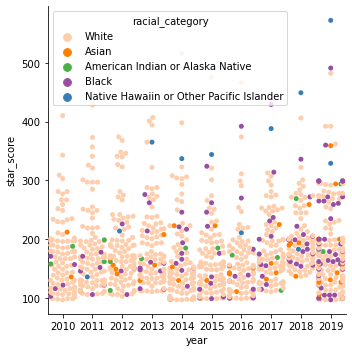

In [63]:
#import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Create a catplot that showcases the star scores for all celebrities since 2010
sns.catplot(x="year", y="star_score", hue="racial_category", palette=['#fdcdac','#ff7f00','#4daf4a','#984ea3','#377eb8'], kind="swarm", legend_out=False,data=decade_df);

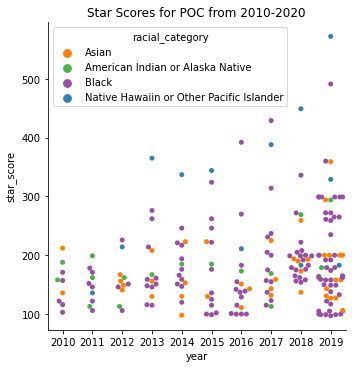

In [66]:
#Create a catplot that shows the Star Score for POC celebrities since 2010 
#This should help convey the info necessary without looking too cluttered
ax = sns.catplot(x='year', y='star_score', hue='racial_category', palette=['#ff7f00','#4daf4a','#984ea3','#377eb8'], kind='swarm', data=decadedf_POC, legend_out=False);
ax.set(title='Star Scores for POC from 2010-2020');

<b>Graphing Star Score Averages Across Time</b>
<br>This graph is a great starting point, as it shows how White dominant the film industry has been, while also highlighting the growth in star scores for POC. However, the visualization itself looks very cluttered and does not make as bold a statement as I'd hope. Below, I tried to filter out the White scores to see if it shows more of an increase for POC actors. 

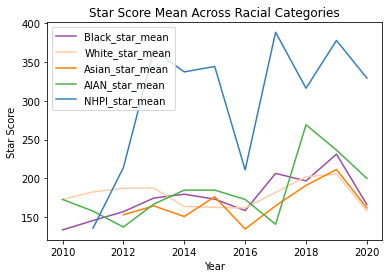

In [67]:
#Create a line plot for the Star Score means for each racial category
ax2 = star_mean_df.plot(color=['#984ea3','#fdcdac','#ff7f00','#4daf4a','#377eb8'])
ax2.set(title='Star Score Mean Across Racial Categories')
ax2.set_xlabel('Year')
ax2.set_ylabel('Star Score');

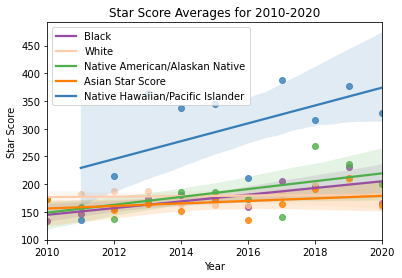

In [68]:
#Create Regression Plot for Average Star Scores
new_figure = plt.figure()
ax1 = sns.regplot(x=years, y='Black_star_mean', color='#984ea3', data=star_mean_df)
sns.regplot(x=years, y='White_star_mean', color='#fdcdac', data=star_mean_df)
sns.regplot(x=years, y='AIAN_star_mean', color='#4daf4a', data=star_mean_df)
sns.regplot(x=years, y='Asian_star_mean', color='#ff7f00', data=star_mean_df)
sns.regplot(x=years, y='NHPI_star_mean', color='#377eb8', data=star_mean_df)
ax1.set_xlabel('Year')
ax1.set_ylabel('Star Score')
ax1.set_title('Star Score Averages for 2010-2020')
ax1.legend(['Black', 'White', 'Native American/Alaskan Native', 'Asian Star Score', 'Native Hawaiian/Pacific Islander']);

<b>Graphing the Numbers of POC Actors and Actresses</b>
<br>
I decided to create a bar graph below to highlight the work that still needs to be done. Because each year lists out the top 100 grossing actors, it was an easy way to get showcase the percentage of POC in the Top 100. The graph below showcases the number of POC altogether in comparison to White actors and actresses. 

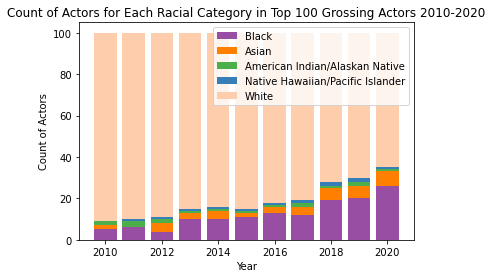

In [71]:
#Create a stacked bar graph to count the number of actors for each racial category

#import necessary libraries
import numpy as np

#Set the bottom for each bar graph 
Asian_bottom = Black_counts
AIAN_bottom = np.add(Asian_bottom, Asian_counts)
NHPI_bottom = np.add(AIAN_bottom, AIAN_counts)
White_bottom = np.add(NHPI_bottom, NHPI_counts)

#Create a graph for the number of celebrities in each racial category
plt.bar(years, race_count_df['Black_count'], color='#984ea3')
plt.bar(years, race_count_df['Asian_count'], color='#ff7f00', bottom=Black_counts)
plt.bar(years, race_count_df['AIAN_count'], color='#4daf4a', bottom=np.add(Black_counts, Asian_counts))
plt.bar(years, race_count_df['NHPI_count'], color='#377eb8', bottom=NHPI_bottom)
plt.bar(years, race_count_df['White_count'], color='#fdcdac', bottom=White_bottom)
plt.legend(['Black', 'Asian', 'American Indian/Alaskan Native', 'Native Hawaiian/Pacific Islander', 'White'])
plt.title('Count of Actors for Each Racial Category in Top 100 Grossing Actors 2010-2020')
plt.xlabel('Year')
plt.ylabel('Count of Actors');

<b>Graphing Average Billing</b>
<br>We can see a clear increase in the number of POC actors and actresses in top-grossing films. Now the question is whether those POC actors and actresses are taking lead roles or do they play the support cast? The graphs below show where actors land on the billing for a film. The line graph shows an increase an average billing for POC, but it gives it a positive connotation. I wanted to toy with how to show that information differently. 

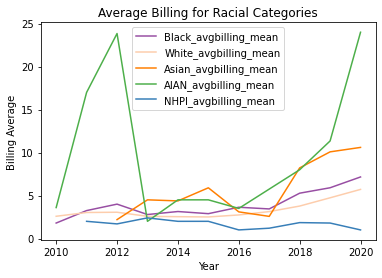

In [74]:
#Create a lineplot that chowcases the Average Billing for each racial category
ax3 = star_avgbilling_df.plot(color=['#984ea3','#fdcdac','#ff7f00','#4daf4a','#377eb8'])
ax3.set(title='Average Billing for Racial Categories', ylabel='Billing')
ax3.set_xlabel('Year')
ax3.set_ylabel('Billing Average');

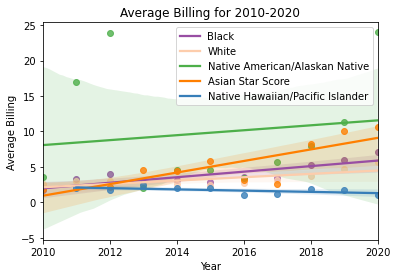

In [76]:
#Create a regression plot for the average billing 
ax4 = sns.regplot(x=years, y='Black_avgbilling_mean', color='#984ea3', data=star_avgbilling_df)
sns.regplot(x=years, y='White_avgbilling_mean', color='#fdcdac', data=star_avgbilling_df)
sns.regplot(x=years, y='AIAN_avgbilling_mean', color='#4daf4a', data=star_avgbilling_df)
sns.regplot(x=years, y='Asian_avgbilling_mean', color='#ff7f00', data=star_avgbilling_df)
sns.regplot(x=years, y='NHPI_avgbilling_mean', color='#377eb8', data=star_avgbilling_df)
ax4.set_xlabel('Year')
ax4.set_ylabel('Average Billing')
ax4.set_title('Average Billing for 2010-2020')
ax4.legend(['Black', 'White', 'Native American/Alaskan Native', 'Asian Star Score', 'Native Hawaiian/Pacific Islander']);